**<h1>Exercise-1</h1>**

**1. Import the required libraries**

In [3]:
import torch

**2. Load the dataset containing a set of 1,000 product reviews from Amazon, which are
paired with a label of 0 (for negative reviews) or 1 (for positive reviews). Get the data at
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences.**

In [4]:
import pandas as pd
df = pd.read_csv('/content/amazon_cells_labelled.txt', delimiter="\t", header = None)
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


**3. Separate the data into two variables: one containing the reviews and the other containing
the labels. Remove the punctuation from the reviews.**

In [5]:
new_columns = ['Reviews', 'Labels']
df.columns = new_columns
df.head()

,Reviews,Labels
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
import string

def remove_punctuation(text):
  new_string = ""
  for character in text:
    if character not in string.punctuation:
      new_string += character
  return new_string

df['Reviews'] = df['Reviews'].apply(remove_punctuation)
df.head()

,Reviews,Labels
0,So there is no way for me to plug it in here i...,0
1,Good case Excellent value,1
2,Great for the jawbone,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great,1


**4. Create a variable containing the vocabulary of the entire set of reviews.**

In [7]:
vocabulary = set()
for review in df['Reviews']:
  for word in review.split():
    vocabulary.add(word)

# Convert the set to a list for easier handling.
vocabulary = list(vocabulary)
print(vocabulary)

['L7c', 'down', 'cables', 'WHAT', 'flush', 'meThe', 'Dissapointing', 'waterproof', 'buds', 'conversations', 'flash', 'user', 'Bought', 'Fire', 'Having', 'irda', 'defective', 'One', 'Windows', 'cheap', 'worth', 'recommended', 'tooth', 'exchange', 'sturdiness', 'we', 'v115g', 'improve', 'Clear', 'intended', 'prime', 'function', 'loudspeaker', 'ringtones', 'Price', 'additional', 'Sanyo', 'Calls', 'poor', 'if', 'bit', 'psyched', 'accessing', 'Leopard', 'only', 'couldnt', 'coverage', 'tick', 'autoanswer', 'support', 'Surefire', 'was', 'called', 'rated', 'new', 'issues', 'drains', 'wit', 'type', 'products', 'H500', 'practice', 'sent', 'theory', 'living', 'chargers', 'barely', 'wife', 'Freezes', 'suddenly', 'nicely', 'car', 'allow', 'hearing', 'places', 'outgoing', 'This', 'frequently4', '6', 'outperform', 'mark', 'product', 'respect', 'REALLY', 'house', 'DROPPED', 'ringing', 'numerous', 'seconds', 'backlight', 'Finally', 'Performance', 'side', 'everyone', 'tool', 'tips', 'each', '700w', 'fri

In [8]:
new_vocabulary = []
for word in vocabulary:
  if not word.isdigit():
    new_vocabulary.append(word)

print(new_vocabulary)

['L7c', 'down', 'cables', 'WHAT', 'flush', 'meThe', 'Dissapointing', 'waterproof', 'buds', 'conversations', 'flash', 'user', 'Bought', 'Fire', 'Having', 'irda', 'defective', 'One', 'Windows', 'cheap', 'worth', 'recommended', 'tooth', 'exchange', 'sturdiness', 'we', 'v115g', 'improve', 'Clear', 'intended', 'prime', 'function', 'loudspeaker', 'ringtones', 'Price', 'additional', 'Sanyo', 'Calls', 'poor', 'if', 'bit', 'psyched', 'accessing', 'Leopard', 'only', 'couldnt', 'coverage', 'tick', 'autoanswer', 'support', 'Surefire', 'was', 'called', 'rated', 'new', 'issues', 'drains', 'wit', 'type', 'products', 'H500', 'practice', 'sent', 'theory', 'living', 'chargers', 'barely', 'wife', 'Freezes', 'suddenly', 'nicely', 'car', 'allow', 'hearing', 'places', 'outgoing', 'This', 'frequently4', 'outperform', 'mark', 'product', 'respect', 'REALLY', 'house', 'DROPPED', 'ringing', 'numerous', 'seconds', 'backlight', 'Finally', 'Performance', 'side', 'everyone', 'tool', 'tips', 'each', '700w', 'friends'

**5. Additionally, create a dictionary that maps each word to an integer, where the words will
be the keys and the integers will be the values.**

In [9]:
word_to_index = {word: index for index, word in enumerate(new_vocabulary)}
print(word_to_index)


{'L7c': 0, 'down': 1, 'cables': 2, 'WHAT': 3, 'flush': 4, 'meThe': 5, 'Dissapointing': 6, 'waterproof': 7, 'buds': 8, 'conversations': 9, 'flash': 10, 'user': 11, 'Bought': 12, 'Fire': 13, 'Having': 14, 'irda': 15, 'defective': 16, 'One': 17, 'Windows': 18, 'cheap': 19, 'worth': 20, 'recommended': 21, 'tooth': 22, 'exchange': 23, 'sturdiness': 24, 'we': 25, 'v115g': 26, 'improve': 27, 'Clear': 28, 'intended': 29, 'prime': 30, 'function': 31, 'loudspeaker': 32, 'ringtones': 33, 'Price': 34, 'additional': 35, 'Sanyo': 36, 'Calls': 37, 'poor': 38, 'if': 39, 'bit': 40, 'psyched': 41, 'accessing': 42, 'Leopard': 43, 'only': 44, 'couldnt': 45, 'coverage': 46, 'tick': 47, 'autoanswer': 48, 'support': 49, 'Surefire': 50, 'was': 51, 'called': 52, 'rated': 53, 'new': 54, 'issues': 55, 'drains': 56, 'wit': 57, 'type': 58, 'products': 59, 'H500': 60, 'practice': 61, 'sent': 62, 'theory': 63, 'living': 64, 'chargers': 65, 'barely': 66, 'wife': 67, 'Freezes': 68, 'suddenly': 69, 'nicely': 70, 'car':

**6. Encode the review data by replacing each word in a review for its paired integer.**

In [10]:
encoded_reviews = []
for review in df['Reviews']:
  encoded_review = [word_to_index[word] for word in review.split() if word in word_to_index]
  encoded_reviews.append(encoded_review)

print(encoded_reviews)


[[1597, 1629, 1101, 1670, 1960, 837, 1951, 1448, 2094, 2161, 418, 877, 418, 473, 739, 1342, 1927, 1945, 130, 280, 1901], [1876, 2136, 1929, 918], [2062, 837, 473, 224], [348, 1448, 1337, 837, 9, 1559, 1402, 692, 410, 1785], [1908, 784, 1101, 1348], [1927, 1268, 1448, 1931, 473, 2094, 1448, 282, 2161, 1448, 597, 407, 493, 1448, 282, 852, 1829], [213, 1028, 1268, 1978, 103, 1129, 1978, 223, 240, 810, 1019, 473, 183, 1384, 1784, 95, 1384, 1540, 952, 130, 952], [213, 1028, 2011, 404, 1615, 1932, 1268, 860], [277, 1448, 1722, 1927, 325, 174, 678], [1821, 280, 933, 1384, 678, 302, 605], [1077, 473, 2116, 2184, 1101, 1348], [1631, 51, 901, 1598, 150, 1783, 323, 473, 1086, 2015, 1448, 473, 1868, 2015], [213, 473, 1176, 1517, 1388, 130, 280, 1618, 1619, 1927, 1943, 1448, 647, 2028, 1481, 302, 335, 2116, 323, 473, 375], [1592, 2132, 2184, 1866], [1908, 2098, 1101, 901, 1494, 1918, 473, 1209, 1749, 1101, 195, 901, 1695, 1033, 1852], [543, 193, 837, 2020, 952, 970, 1847, 280, 2150, 22, 971], [1927

**7. Create a class containing the architecture of the network.**

In [11]:
class SentimentNetwork(torch.nn.Module):
  def __init__(self, vocabulary_size, embedding_dimension, hidden_dimension, output_dimension):
    super(SentimentNetwork, self).__init__()
    self.embedding = torch.nn.Embedding(vocabulary_size, embedding_dimension)
    self.rnn = torch.nn.RNN(embedding_dimension, hidden_dimension)
    self.linear = torch.nn.Linear(hidden_dimension, output_dimension)

  def forward(self, x):
    x = self.embedding(x)
    output, hidden = self.rnn(x)
    output = self.linear(hidden[-1])
    return output


**8. Make sure that you include an embedding layer. Initialize the model using 64 embedding
dimensions and 128 neurons for 3 LSTM layers.**

In [12]:
# Initialize the model
vocabulary_size = len(new_vocabulary)
embedding_dimension = 64
hidden_dimension = 128
output_dimension = 2  # Assuming binary classification (positive/negative)

model = SentimentNetwork(vocabulary_size, embedding_dimension, hidden_dimension, output_dimension)
print(model)

SentimentNetwork(
  (embedding): Embedding(2186, 64)
  (rnn): RNN(64, 128)
  (linear): Linear(in_features=128, out_features=2, bias=True)
)


**9. Define the loss function, an optimization algorithm, and the number of epochs to train for.
For example, you can use binary cross-entropy loss as the loss function, the Adam
optimizer, and train for 10 epochs.**

In [13]:
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Define the number of epochs
epochs = 10


**10. Create a "for" loop that goes through the different epochs and through every single
review individually. For each review, perform a prediction, calculate the loss function, and
update the parameters of the network. Additionally, calculate the accuracy of the network
over that training data.**

In [14]:
# Training loop
losses = []
accuracies = []
for epoch in range(epochs):
  total_loss = 0
  correct_predictions = 0
  total_predictions = 0

  for i in range(len(encoded_reviews)):
    review = torch.tensor(encoded_reviews[i])
    label = torch.tensor(df['Labels'][i], dtype=torch.long)

    # Forward pass
    output = model(review)

    # Calculate the loss
    # Remove unsqueeze as it is not needed
    loss = criterion(output, label)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate the accuracy
    _, predicted = torch.max(output, 0) # Changed from 1 to 0 to match the output shape
    correct_predictions += (predicted == label).sum().item()
    total_predictions += 1

    # Accumulate the loss
    total_loss += loss.item()


  # Print the average loss and accuracy for the epoch
  average_loss = total_loss / len(encoded_reviews)
  accuracy = correct_predictions / total_predictions
  losses.append(average_loss)
  accuracies.append(accuracy)

  print(f'Epoch: {epoch + 1}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch: 1, Loss: 0.6947, Accuracy: 0.5690
Epoch: 2, Loss: 0.5828, Accuracy: 0.6940
Epoch: 3, Loss: 0.4892, Accuracy: 0.7710
Epoch: 4, Loss: 0.3665, Accuracy: 0.8420
Epoch: 5, Loss: 0.2783, Accuracy: 0.8880
Epoch: 6, Loss: 0.1780, Accuracy: 0.9310
Epoch: 7, Loss: 0.1162, Accuracy: 0.9610
Epoch: 8, Loss: 0.0446, Accuracy: 0.9890
Epoch: 9, Loss: 0.0359, Accuracy: 0.9880
Epoch: 10, Loss: 0.0338, Accuracy: 0.9910


**11. Plot the progress of the loss function and accuracy over time.**

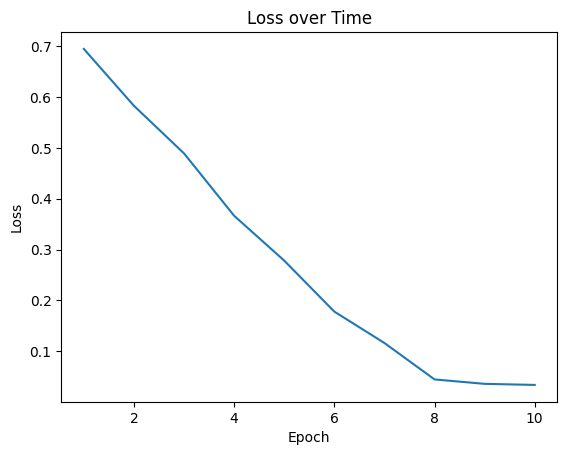

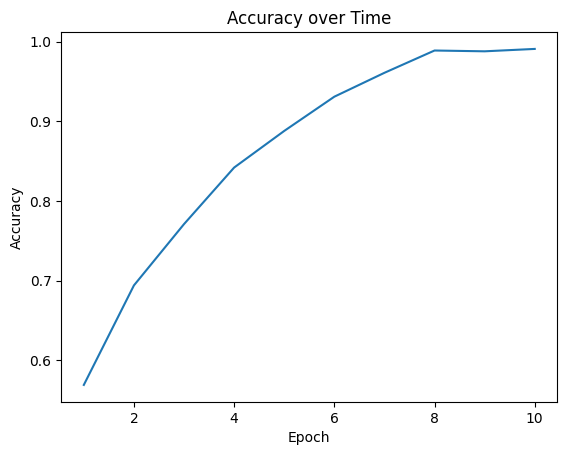

In [15]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()

# Plot the accuracy
plt.plot(range(1, epochs + 1), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')
plt.show()


**<h1>Exercise-2</h1>**

**Sentiment Analysis
Consider the following text:    
sentence = “””The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines,
and crawling across boulder-strewn trails.”””**

#####################################################################

**1. Replace special characters with empty spaces. You can use regex or any other method**

In [16]:
import re

sentence = '''The larger Broncos will be available with 35-inch off-road tires and will be able
to drive through water nearly 3 feet, 10 inches deep. It has independent front suspension, unlike its main competitor, the Jeep Wrangler. Independent suspension, used
on almost all modern passenger vehicles, generally provides a smoother ride and better on
road handling than a single solid axle. It still has a solid axle in the back though, like most
pickup trucks, a design suited to hard use. Like the Wrangler, both the two- and four-door
Bronco will have a removable roofs and doors. Buyers will be able to choose either a hard
roof that can be removed in sections, a cloth top, or both. Unlike the Wrangler, though, the
Bronco's doors will fit inside the vehicle after being removed. The Bronco will be available
with a choice of either a 10-speed automatic or seven-speed manual transmission. (The
manual transmission will have six gears for ordinary driving, plus a seventh for low speed
off-road driving.) It will be powered by either a 270- horsepower 2.3-liter turbocharged 4
cylinder engine or a 310-horsepower 2.7-liter turbocharged V6. While all of the new Bronco
SUVs are designed for hard off-road use, the Bronco Sport isn't quite as hard-core in its
capabilities. It also has more convenience features than the more truck-like Bronco. While
it's based on engineering that's similar to car-like crossover SUVs, Ford says that it's still
intended for serious off-road use. Ford engineers boasted of the off-road testing the
prototypes have been put through, including driving through deep sand, up steep inclines,
and crawling across boulder-strewn trails.'''

# Replace special characters with empty spaces using regex
sentence = re.sub(r'[^\w\s]', ' ', sentence)

print(sentence)

The larger Broncos will be available with 35 inch off road tires and will be able
to drive through water nearly 3 feet  10 inches deep  It has independent front suspension  unlike its main competitor  the Jeep Wrangler  Independent suspension  used
on almost all modern passenger vehicles  generally provides a smoother ride and better on
road handling than a single solid axle  It still has a solid axle in the back though  like most
pickup trucks  a design suited to hard use  Like the Wrangler  both the two  and four door
Bronco will have a removable roofs and doors  Buyers will be able to choose either a hard
roof that can be removed in sections  a cloth top  or both  Unlike the Wrangler  though  the
Bronco s doors will fit inside the vehicle after being removed  The Bronco will be available
with a choice of either a 10 speed automatic or seven speed manual transmission   The
manual transmission will have six gears for ordinary driving  plus a seventh for low speed
off road driving   It

**2. Remove multiple empty spaces and replace them with a single space**

In [17]:
sentence = re.sub(r'\s+', ' ', sentence)
print(sentence)

The larger Broncos will be available with 35 inch off road tires and will be able to drive through water nearly 3 feet 10 inches deep It has independent front suspension unlike its main competitor the Jeep Wrangler Independent suspension used on almost all modern passenger vehicles generally provides a smoother ride and better on road handling than a single solid axle It still has a solid axle in the back though like most pickup trucks a design suited to hard use Like the Wrangler both the two and four door Bronco will have a removable roofs and doors Buyers will be able to choose either a hard roof that can be removed in sections a cloth top or both Unlike the Wrangler though the Bronco s doors will fit inside the vehicle after being removed The Bronco will be available with a choice of either a 10 speed automatic or seven speed manual transmission The manual transmission will have six gears for ordinary driving plus a seventh for low speed off road driving It will be powered by eithe

**3. Remove any single character**

In [18]:
sentence = re.sub(r'\b\w\b', '', sentence)
print(sentence)

The larger Broncos will be available with 35 inch off road tires and will be able to drive through water nearly  feet 10 inches deep It has independent front suspension unlike its main competitor the Jeep Wrangler Independent suspension used on almost all modern passenger vehicles generally provides  smoother ride and better on road handling than  single solid axle It still has  solid axle in the back though like most pickup trucks  design suited to hard use Like the Wrangler both the two and four door Bronco will have  removable roofs and doors Buyers will be able to choose either  hard roof that can be removed in sections  cloth top or both Unlike the Wrangler though the Bronco  doors will fit inside the vehicle after being removed The Bronco will be available with  choice of either  10 speed automatic or seven speed manual transmission The manual transmission will have six gears for ordinary driving plus  seventh for low speed off road driving It will be powered by either  270 horse

**4. Convert the text to all lowercase**

In [19]:
sentence = sentence.lower()
print(sentence)

the larger broncos will be available with 35 inch off road tires and will be able to drive through water nearly  feet 10 inches deep it has independent front suspension unlike its main competitor the jeep wrangler independent suspension used on almost all modern passenger vehicles generally provides  smoother ride and better on road handling than  single solid axle it still has  solid axle in the back though like most pickup trucks  design suited to hard use like the wrangler both the two and four door bronco will have  removable roofs and doors buyers will be able to choose either  hard roof that can be removed in sections  cloth top or both unlike the wrangler though the bronco  doors will fit inside the vehicle after being removed the bronco will be available with  choice of either  10 speed automatic or seven speed manual transmission the manual transmission will have six gears for ordinary driving plus  seventh for low speed off road driving it will be powered by either  270 horse

**5. Split the text into individual words**

In [20]:
words = sentence.split()
print(words)

['the', 'larger', 'broncos', 'will', 'be', 'available', 'with', '35', 'inch', 'off', 'road', 'tires', 'and', 'will', 'be', 'able', 'to', 'drive', 'through', 'water', 'nearly', 'feet', '10', 'inches', 'deep', 'it', 'has', 'independent', 'front', 'suspension', 'unlike', 'its', 'main', 'competitor', 'the', 'jeep', 'wrangler', 'independent', 'suspension', 'used', 'on', 'almost', 'all', 'modern', 'passenger', 'vehicles', 'generally', 'provides', 'smoother', 'ride', 'and', 'better', 'on', 'road', 'handling', 'than', 'single', 'solid', 'axle', 'it', 'still', 'has', 'solid', 'axle', 'in', 'the', 'back', 'though', 'like', 'most', 'pickup', 'trucks', 'design', 'suited', 'to', 'hard', 'use', 'like', 'the', 'wrangler', 'both', 'the', 'two', 'and', 'four', 'door', 'bronco', 'will', 'have', 'removable', 'roofs', 'and', 'doors', 'buyers', 'will', 'be', 'able', 'to', 'choose', 'either', 'hard', 'roof', 'that', 'can', 'be', 'removed', 'in', 'sections', 'cloth', 'top', 'or', 'both', 'unlike', 'the', 'wr

**6. Remove stopwords**

In [23]:
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
print(filtered_words)

['larger', 'broncos', 'available', '35', 'inch', 'road', 'tires', 'able', 'drive', 'water', 'nearly', 'feet', '10', 'inches', 'deep', 'independent', 'front', 'suspension', 'unlike', 'main', 'competitor', 'jeep', 'wrangler', 'independent', 'suspension', 'used', 'almost', 'modern', 'passenger', 'vehicles', 'generally', 'provides', 'smoother', 'ride', 'better', 'road', 'handling', 'single', 'solid', 'axle', 'still', 'solid', 'axle', 'back', 'though', 'like', 'pickup', 'trucks', 'design', 'suited', 'hard', 'use', 'like', 'wrangler', 'two', 'four', 'door', 'bronco', 'removable', 'roofs', 'doors', 'buyers', 'able', 'choose', 'either', 'hard', 'roof', 'removed', 'sections', 'cloth', 'top', 'unlike', 'wrangler', 'though', 'bronco', 'doors', 'fit', 'inside', 'vehicle', 'removed', 'bronco', 'available', 'choice', 'either', '10', 'speed', 'automatic', 'seven', 'speed', 'manual', 'transmission', 'manual', 'transmission', 'six', 'gears', 'ordinary', 'driving', 'plus', 'seventh', 'low', 'speed', 'ro

**7. Tokenize, stem, and lemmatize the text**

In [26]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Tokenize, stem, and lemmatize the words
tokenized_words = filtered_words  # Assuming filtered_words is the list of words after stop words removal

stemmed_words = [stemmer.stem(word) for word in tokenized_words]

lemmatized_words = [lemmatizer.lemmatize(word) for word in tokenized_words]

print("Stemmed Words:", stemmed_words)
print("Lemmatized Words:", lemmatized_words)

Stemmed Words: ['larger', 'bronco', 'avail', '35', 'inch', 'road', 'tire', 'abl', 'drive', 'water', 'nearli', 'feet', '10', 'inch', 'deep', 'independ', 'front', 'suspens', 'unlik', 'main', 'competitor', 'jeep', 'wrangler', 'independ', 'suspens', 'use', 'almost', 'modern', 'passeng', 'vehicl', 'gener', 'provid', 'smoother', 'ride', 'better', 'road', 'handl', 'singl', 'solid', 'axl', 'still', 'solid', 'axl', 'back', 'though', 'like', 'pickup', 'truck', 'design', 'suit', 'hard', 'use', 'like', 'wrangler', 'two', 'four', 'door', 'bronco', 'remov', 'roof', 'door', 'buyer', 'abl', 'choos', 'either', 'hard', 'roof', 'remov', 'section', 'cloth', 'top', 'unlik', 'wrangler', 'though', 'bronco', 'door', 'fit', 'insid', 'vehicl', 'remov', 'bronco', 'avail', 'choic', 'either', '10', 'speed', 'automat', 'seven', 'speed', 'manual', 'transmiss', 'manual', 'transmiss', 'six', 'gear', 'ordinari', 'drive', 'plu', 'seventh', 'low', 'speed', 'road', 'drive', 'power', 'either', '270', 'horsepow', 'liter', '

**8. What is the overall sentiment and subjectivity of the text**

In [27]:
# We'll use TextBlob for sentiment analysis
from textblob import TextBlob

# Join the lemmatized words back into a sentence
sentence_processed = " ".join(lemmatized_words)

# Create a TextBlob object
blob = TextBlob(sentence_processed)

# Get the sentiment polarity (ranges from -1 to 1, where -1 is negative and 1 is positive)
sentiment_polarity = blob.sentiment.polarity

# Get the subjectivity (ranges from 0 to 1, where 0 is objective and 1 is subjective)
sentiment_subjectivity = blob.sentiment.subjectivity


print(f"Sentiment Polarity: {sentiment_polarity}")
print(f"Sentiment Subjectivity: {sentiment_subjectivity}")

# Interpret the sentiment based on polarity
if sentiment_polarity > 0:
    print("Overall Sentiment: Positive")
elif sentiment_polarity < 0:
    print("Overall Sentiment: Negative")
else:
    print("Overall Sentiment: Neutral")

# Interpret the subjectivity
if sentiment_subjectivity > 0.5:
    print("Overall Subjectivity: Subjective")
else:
    print("Overall Subjectivity: Objective")


Sentiment Polarity: 0.07005523212419763
Sentiment Subjectivity: 0.3943275115688909
Overall Sentiment: Positive
Overall Subjectivity: Objective
